In [1]:
import xlrd 
import numpy as np
import matplotlib.pylab as pylab
import matplotlib
from matplotlib import pyplot as plt 
file = 'sms_400us_poe.xlsx'
data = xlrd.open_workbook(file)
table = data.sheet_by_name('Summary')
FIG_DIR = "C:/Users/dx/Desktop/POE-ASPLOS-V14.1/POE-ASPLOS-V14.1/Figure/"

plt.style.use('default');

DMCidle = np.array(table.col_values(15)[1:]).reshape(12,22)


In [2]:
rp_labels = ['SRRIP','SPDP','WRPDP','DRRIP','DIP']
pf_labels = ['PMS','None','BO']
ds_labels = ['Onmyoji','Honor of Kings','UC Browser','QQ Speed Mobile','NBA 2K19','Knives Out','Fortnite','TikTok','Identity V','PUBG Mobile','Honkai Impact 3','Cross Fire Mobile']

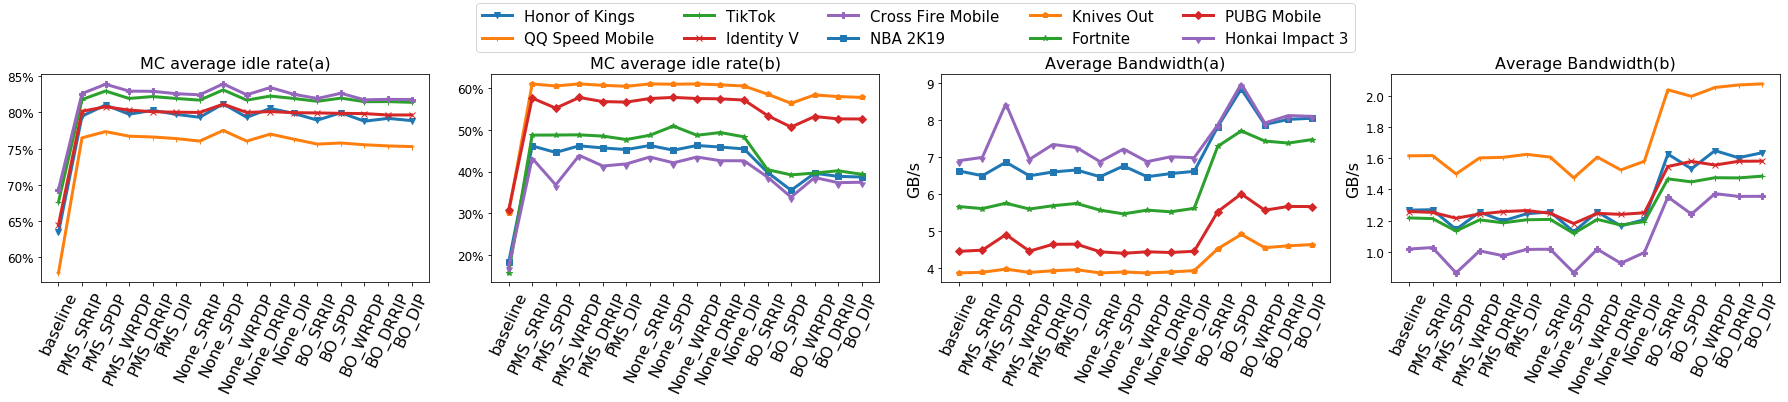

In [3]:

from matplotlib.ticker import FuncFormatter

params = {
            'axes.labelsize': '16',
            'xtick.labelsize': '16',
            'ytick.labelsize': '12',
            'lines.linewidth': '3',
            'legend.fontsize': '12',
            'figure.figsize': '25, 5'  # set figure size
        }
pylab.rcParams.update(params)

col = [4,10,15]
labels = ['baseline']
titles = ["MC average idle rate(a)","MC average idle rate(b)","Average Bandwidth(a)","Average Bandwidth(b)","Power Reduction"]
markers = ['.','v','^','1','s','p','*','+','x','D',matplotlib.markers.CARETDOWNBASE,'P',',','h']
for i in range(15):
    labels.append(pf_labels[int(i/5)] + '_' + rp_labels[int(i%5)])
###################################
# a=np.array(table.col_values(15)[1:]).reshape(12,22)
# b = a[:,1]

# for i in range(12):
#     a[i]=a[i] - b[i]


###################################


def to_percent(temp, position):
    return '%.0f'%(100*temp) + '%'
  
j=0
fig, axs = plt.subplots(nrows=1, ncols=4)
#for row in axs:
#    for ax in row:
for ax in axs:
        DMCidle = np.array(table.col_values(col[j//2])[1:]).reshape(12,22)
        DMCidle = np.concatenate(( DMCidle[:,0:7], DMCidle[:,12:22]), axis=1) 
        baseline = DMCidle[:,1]
      #  print(DMCidle)
        for i in range(12):
            if(i!=0 and i!=2 ):
                if (j==0 and DMCidle[i,1]>0.5) or (j==1 and DMCidle[i,1]<0.5) or (j==2 and DMCidle[i,1]>3) or (j==3 and DMCidle[i,1]<3):
                    ax.plot(labels, DMCidle[i,1:], label= ds_labels[i],marker = markers[i])   
        ax.set_title(titles[j],fontsize=16)
        if(j>1):
            ax.set_ylabel("GB/s")
            ax.set_xticks(np.arange(len(labels)))
            ax.set_xticklabels(labels)
            #plt.xticks(rotation=90) 
            for xtick in ax.get_xticklabels():
                xtick.set_rotation(65)
        else:
            ax.set_xticks(np.arange(len(labels)))
            ax.set_xticklabels(labels)
            #plt.xticks(rotation=90) 
            for xtick in ax.get_xticklabels():
                xtick.set_rotation(65)
            ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
        if j==1:
           fig.legend(bbox_to_anchor=(0.26,1.13),loc=2,prop={'size':15}, ncol=5) #  
        j=j+1
fig.tight_layout()
plt.savefig(FIG_DIR+"idle_bw_lx.pdf", bbox_inches="tight")
plt.show()

In [30]:
# def test_table1():
#     data_table = pd.DataFrame({'Workload':['Fortnite']*20 + ['TikTok']*20+ ['Identity V']*20
#                                + ['PUBG Mobile']*20+ ['honkai impact 3']*20+ ['Cross Fire Mobile']*20,
#                                'Prefetcher':(['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
#                                'ReplacePolicy':['SRRIP','SPDP','WRPDP','DRRIP','DIP']*24,
#                                'IDLE':idle[6:12,2:].reshape(1,120).flatten(),
#                                'ACT':act[6:12,2:].reshape(1,120).flatten(),
#                                'AR':ar[6:12,2:].reshape(1,120).flatten()
#                                })
#     return data_table
# def add_line(ax, xpos, ypos):
#     line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
#                       transform=ax.transAxes, color='black')
#     line.set_clip_on(False)
#     ax.add_line(line)

# def label_len(my_index,level):
#     labels = my_index.get_level_values(level)
#     return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

# def label_group_bar_table(ax, df):
#     ypos = -.1
#     scale = 1./df.index.size
#     for level in range(df.index.nlevels)[::-1]:
#         pos = 0
#         for label, rpos in label_len(df.index,level):
#             lxpos = (pos + .5 * rpos)*scale
#             if(rpos == 1):
#                 ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,rotation='vertical',fontsize=7)#,rotation='vertical'
#             else:
#                 ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
#             add_line(ax, pos*scale, ypos)
#             pos += rpos
#         add_line(ax, pos*scale , ypos)
#         ypos -= .1
# df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()

ValueError: cannot reshape array of size 114 into shape (1,120)

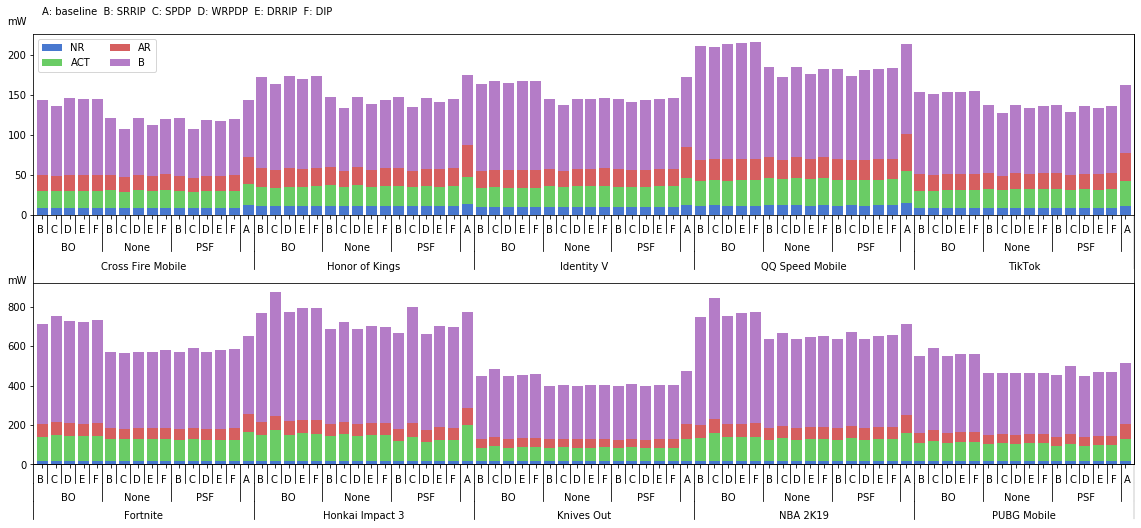

In [4]:
##Figure 10: Power
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby
params = {
            'axes.labelsize': '10',
            'xtick.labelsize': '10',
            'ytick.labelsize': '10',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 7.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
nr = D*20 
ar = F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
b = K*70
power = nr + act + ar +b
#plt.style.use('tableau-colorblind10');
plt.style.use('seaborn-muted')
#plt.style.use('fivethirtyeight');
def test_table_all():
    data_table = pd.DataFrame({'Workload':['Onmyoji']*21 + ['Honor of Kings']*21+ ['UC Browser']*21
                               + ['QQ Speed Mobile']*21+ ['NBA 2K19']*21+ ['Knives Out']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*6,
                               'NR':nr[0:6,1:].reshape(1,126).flatten(),
                               'ACT':act[0:6,1:].reshape(1,126).flatten(),
                               'AR':ar[0:6,1:].reshape(1,126).flatten(),
                               'B' :b[0:6,1:].reshape(1,126).flatten()
                               
                               })
    data_table2 = pd.DataFrame({'Workload':['Fortnite']*21 + ['TikTok']*21+ ['Identity V']*21
                               + ['PUBG Mobile']*21+ ['Honkai Impact 3']*21+ ['Cross Fire Mobile']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*6,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*6,
                               'NR':nr[6:12,1:].reshape(1,126).flatten(),
                               'ACT':act[6:12,1:].reshape(1,126).flatten(),
                               'AR':ar[6:12,1:].reshape(1,126).flatten(),
                                'B' :b[6:12,1:].reshape(1,126).flatten()
                               })
    return pd.concat([data_table, data_table2])

def test_table():
    data_table = test_table_all()
    data_table = data_table[data_table['Workload'].isin(['Honor of Kings','QQ Speed Mobile','TikTok','Identity V','Cross Fire Mobile'])]
    data_table = data_table[~data_table['Prefetcher'].isin(['SMS'])]
    return data_table

def test_table1():
    data_table = test_table_all()
    data_table = data_table[data_table['Workload'].isin(['NBA 2K19','Knives Out','Fortnite','PUBG Mobile','Honkai Impact 3'])]
    data_table = data_table[~data_table['Prefetcher'].isin(['SMS'])]
    return data_table

def add_line(ax, xpos, ypos,width):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black',linewidth=width)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    linewidth = 0.8
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            if(rpos == 1):
                if(label!='baseline'):
                    ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,fontsize=10)#,rotation='vertical'
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
            add_line(ax, pos*scale, ypos,linewidth)
            pos += rpos
        add_line(ax, pos*scale , ypos,0.2)
        ypos -= .1

df = test_table().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
#print(df)
 
fig = plt.figure()
#plt.style.context('grayscale', after_reset=True)
#plt.style.use('seaborn');
#plt.style.use('bmh') 
plt.yticks([])  
plt.xticks([]) 
#plt.title('Power',fontsize=16)


ax = fig.add_subplot(211)
df.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8)#x + i* width/20 - width/2
plt.text(0, 250, 'A: baseline  B: SRRIP  C: SPDP  D: WRPDP  E: DRRIP  F: DIP',fontsize=10) #330
plt.text(-0.015, 1.05, 'mW' , ha='center', transform=ax.transAxes,fontsize=10)
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.subplots_adjust( hspace=-0.3)

ax1 = fig.add_subplot(212)
df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
df1.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8,legend =False)#x + i* width/20 - width/2

#Below 3 lines remove default labels
labels = ['' for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels)
ax1.set_xlabel('')
label_group_bar_table(ax1, df1)
fig.subplots_adjust(bottom=.1*df1.index.nlevels)
fig.tight_layout()
ax.legend(prop={'size':10},loc=2, ncol=2)
#plt.ylabel('mW',rotation=0,x=-500,y=0.95)
ax1.text(-0.015, -0.38, 'mW' , ha='center', transform=ax.transAxes,fontsize=10)
plt.savefig(FIG_DIR+'power.pdf')
plt.show()
plt.close()

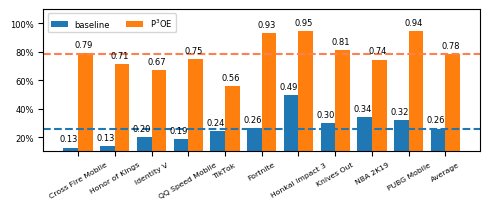

In [26]:
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
plt.style.use('default')
params = {
#             'axes.labelsize': '16',
            'xtick.labelsize': '5.5',
            'ytick.labelsize': '6',
#             'lines.linewidth': '2',
            'legend.fontsize': '6',
            'figure.figsize': '5,2.2'  # set figure size
        }
pylab.rcParams.update(params)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-1.5, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 6)
        
summary_df = pd.read_excel(file, 'Summary')
# summary_df = summary_df[(~summary_df['configuration'].str.contains('yinyangshi')) & (~summary_df['configuration'].str.contains('uc_web'))]
# syscache_df = summary_df[(summary_df['configuration'].str.contains("syscache64")) | (summary_df['configuration'].str.contains("_SMS_DynWRSRRIP"))]
low_bw = ['CF','wzry','di5renge','qq_car','douyin']
high_bw = ['fortnite','bh3','hyxd','nba','cjzc60fps']
tmps=[]
summary_df = pd.read_excel(file, 'Summary')
summary_df = summary_df[(~summary_df['configuration'].str.contains('yinyangshi')) & (~summary_df['configuration'].str.contains('uc_web'))]
for wl in low_bw:
    tmp = summary_df[summary_df['configuration'].str.contains(wl)]
    tmp = tmp[(tmp['configuration'].str.contains("BO_SPDP")) | (tmp['configuration'].str.contains("_SMS_SPDP"))]
    tmps.append(tmp)   
for wl in high_bw:
    tmp = summary_df[summary_df['configuration'].str.contains(wl)]
    tmp = tmp[(tmp['configuration'].str.contains("BO_DynWRSRRIP")) | (tmp['configuration'].str.contains("_SMS_DynWRSRRIP"))]
    tmps.append(tmp)       
syscache_df = pd.concat(tmps,ignore_index=True)

# _ds_label = low_bw
# _ds_label.extend(high_bw)
low_bw = ['CF','wzry','di5renge','qq_car','douyin']
high_bw = ['fortnite','bh3','hyxd','nba','cjzc60fps']
_ds_label = ['Cross Fire Mobile','Honor of Kings','Identity V','QQ Speed Mobile','TikTok','Fortnite','Honkai Impact 3','Knives Out','NBA 2K19','PUBG Mobile']
_ds_label.append('Average')

# for x in ds_labels:
#     if x != 'Onmyoji' and x != 'UC Browser':
#         _ds_label.append(x)
        #_ds_label.append(x + " POE")z


rotation = 30

data = np.append(syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,0],syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,0].mean(axis=0))
data1 = np.append(syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,1],syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,1].mean(axis=0))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = np.arange(data.shape[0])
rect=plt.bar(ind-0.2, data1, label='baseline', width=0.4)
rect1=plt.bar(ind+0.2, data, label='P$^3$OE', width=0.4)
ax.axhline(syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,1].mean(axis=0), linewidth=1.5,linestyle='--')
ax.axhline(syscache_df['Prefetch Accuracy'].values.reshape(-1, 2)[: ,0].mean(axis=0), color='coral', linewidth=1.5,linestyle='--')
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=rotation)
plt.ylim(0.10,1.1)
yticks = mtick.PercentFormatter(xmax=1, decimals=0)
autolabel(rect)
autolabel(rect1)
ax.yaxis.set_major_formatter(yticks)
plt.legend(ncol=2,loc=2)
plt.savefig(FIG_DIR+'PrefetchAccuracy.pdf',bbox_inches='tight')
fig.tight_layout()
plt.show()
plt.close()


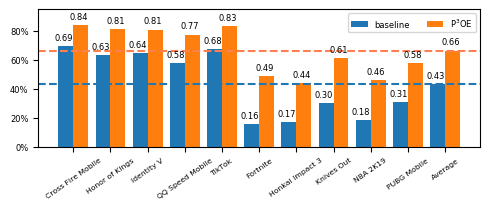

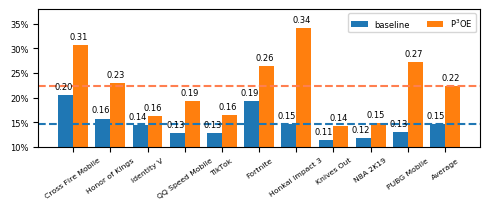

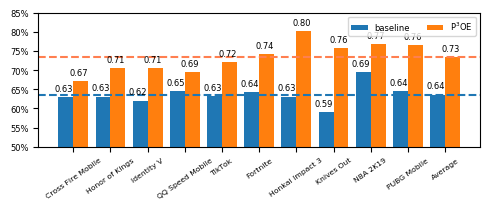

In [30]:
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
plt.style.use('default')
params = {
#             'axes.labelsize': '16',
            'xtick.labelsize': '5.5',
            'ytick.labelsize': '6',
#             'lines.linewidth': '2',
            'legend.fontsize': '6',
            'figure.figsize': '5,2.2'  # set figure size
        }
pylab.rcParams.update(params)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-1.5, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 6)
        
summary_df = pd.read_excel(file, 'Summary')
# summary_df = summary_df[(~summary_df['configuration'].str.contains('yinyangshi')) & (~summary_df['configuration'].str.contains('uc_web'))]
# syscache_df = summary_df[(summary_df['configuration'].str.contains("syscache64")) | (summary_df['configuration'].str.contains("_SMS_DynWRSRRIP"))]
low_bw = ['CF','wzry','di5renge','qq_car','douyin']
high_bw = ['fortnite','bh3','hyxd','nba','cjzc60fps']
tmps=[]
summary_df = pd.read_excel(file, 'Summary')
summary_df = summary_df[(~summary_df['configuration'].str.contains('yinyangshi')) & (~summary_df['configuration'].str.contains('uc_web'))]
for wl in low_bw:
    tmp = summary_df[summary_df['configuration'].str.contains(wl)]
    tmp = tmp[(tmp['configuration'].str.contains("syscache64")) | (tmp['configuration'].str.contains("_SMS_SPDP"))]
    tmps.append(tmp)   
for wl in high_bw:
    tmp = summary_df[summary_df['configuration'].str.contains(wl)]
    tmp = tmp[(tmp['configuration'].str.contains("syscache64")) | (tmp['configuration'].str.contains("_SMS_DynWRSRRIP"))]
    tmps.append(tmp)       
syscache_df = pd.concat(tmps,ignore_index=True)

# _ds_label = low_bw
# _ds_label.extend(high_bw)
low_bw = ['CF','wzry','di5renge','qq_car','douyin']
high_bw = ['fortnite','bh3','hyxd','nba','cjzc60fps']
_ds_label = ['Cross Fire Mobile','Honor of Kings','Identity V','QQ Speed Mobile','TikTok','Fortnite','Honkai Impact 3','Knives Out','NBA 2K19','PUBG Mobile']
_ds_label.append('Average')

# for x in ds_labels:
#     if x != 'Onmyoji' and x != 'UC Browser':
#         _ds_label.append(x)
        #_ds_label.append(x + " POE")z


rotation = 35
data = np.append(syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,0],syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,0].mean(axis=0))
data1 = np.append(syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,1],syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,1].mean(axis=0))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = np.arange(data.shape[0])
rect=plt.bar(ind-0.2, data, label='baseline', width=0.4)
rect1=plt.bar(ind+0.2, data1, label='P$^3$OE', width=0.4)
ax.axhline(syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,0].mean(axis=0), linewidth=1.5,linestyle='--')
ax.axhline(syscache_df['DMC average idle%'].values.reshape(-1, 2)[: ,1].mean(axis=0), color='coral', linewidth=1.5,linestyle='--')
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=rotation)
yticks = mtick.PercentFormatter(xmax=1, decimals=0)
ax.yaxis.set_major_formatter(yticks)
autolabel(rect)
autolabel(rect1)
plt.ylim(0.,0.95)
plt.legend(loc=0,ncol=2)
plt.savefig(FIG_DIR+'baseline_idle.pdf',bbox_inches='tight')
fig.tight_layout()
plt.show()
plt.close()

data = np.append(syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,0],syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,0].mean(axis=0))
data1 = np.append(syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,1],syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,1].mean(axis=0))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = np.arange(data.shape[0])
rect=plt.bar(ind-0.2, data, label='baseline', width=0.4)
rect1=plt.bar(ind+0.2, data1, label='P$^3$OE', width=0.4)
ax.axhline(syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,0].mean(axis=0), linewidth=1.5,linestyle='--')
ax.axhline(syscache_df['sys cache hit rate'].values.reshape(-1, 2)[: ,1].mean(axis=0), color='coral', linewidth=1.5,linestyle='--')
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=rotation)
plt.ylim(0.10,0.38)
yticks = mtick.PercentFormatter(xmax=1, decimals=0)
autolabel(rect)
autolabel(rect1)
ax.yaxis.set_major_formatter(yticks)
plt.legend(ncol=2,loc=0)
plt.savefig(FIG_DIR+'baseline_sc_hitrate.pdf',bbox_inches='tight')
fig.tight_layout()
plt.show()
plt.close()


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
row_miss_data = syscache_df['DMC Activate'] / (syscache_df['DMC Read'] + syscache_df['DMC Write'])
row_hit_data = 1 - row_miss_data;
data = np.append(row_hit_data.values.reshape(-1, 2)[: ,0],row_hit_data.values.reshape(-1, 2)[: ,0].mean(axis=0))
data1 = np.append(row_hit_data.values.reshape(-1, 2)[: ,1],row_hit_data.values.reshape(-1, 2)[: ,1].mean(axis=0))
ind = np.arange(data.shape[0])
rect=plt.bar(ind-0.2, data, label='baseline', width=0.4)
rect1=plt.bar(ind+0.2, data1, label='P$^3$OE', width=0.4)
ax.axhline(row_hit_data.values.reshape(-1, 2)[: ,0].mean(axis=0), linewidth=1.5,linestyle='--')
ax.axhline(row_hit_data.values.reshape(-1, 2)[: ,1].mean(axis=0), color='coral', linewidth=1.5,linestyle='--')
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=rotation)
plt.ylim(0.5,0.85)
yticks = mtick.PercentFormatter(xmax=1, decimals=0)
autolabel(rect)
autolabel(rect1)
ax.yaxis.set_major_formatter(yticks)
plt.legend(loc=0,ncol=2)
plt.savefig(FIG_DIR+'baseline_sc_rowmissrate.pdf',bbox_inches='tight')
fig.tight_layout()
plt.show()
plt.close()


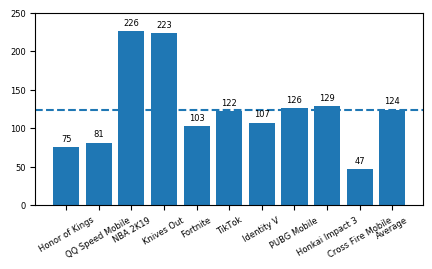

In [57]:
import xlrd 
import numpy as np
import matplotlib.pylab as pylab
import matplotlib
from matplotlib import pyplot as plt 
file = 'Average distance.xlsx'
data = xlrd.open_workbook(file)
table = data.sheet_by_name('Sheet1')
#FIG_DIR = "C:/Users/dx/Desktop/ASPLOS/FIG/"
import pandas as pd
import matplotlib.ticker as mtick
params = {
#             'axes.labelsize': '16',
            'xtick.labelsize': '6',
            'ytick.labelsize': '6',
#             'lines.linewidth': '2',
            'legend.fontsize': '6',
            'figure.figsize': '5,2.5'  # set figure size
        }
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",

                    ha='center', va='bottom',fontsize = 6)

_ds_label=[]        
for x in ds_labels:
    if x != 'Onmyoji' and x != 'UC Browser':
        _ds_label.append(x)
_ds_label.append('Average')

width = 0.4
pylab.rcParams.update(params)
ARD = np.array(table.col_values(1)[1:])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind = np.arange(11)
rects=plt.bar(ind, np.append(ARD,ARD.mean(axis=0),axis=None))
ax.axhline(ARD.mean(axis=0), linewidth=1.5,linestyle='--')
autolabel(rects)
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=30)
plt.ylim(0,250)
plt.savefig(FIG_DIR+'AverageReuseDistance.pdf',bbox_inches='tight')
plt.show()
plt.close()



In [ ]:
import xlrd 
import numpy as np
import matplotlib.pylab as pylab
import matplotlib
from matplotlib import pyplot as plt 
file = 'prefetch acc.xlsx'
data = xlrd.open_workbook(file)
table = data.sheet_by_name('Sheet1')
#FIG_DIR = "C:/Users/dx/Desktop/ASPLOS/FIG/"
import pandas as pd
import matplotlib.ticker as mtick
params = {
#             'axes.labelsize': '16',
            'xtick.labelsize': '6',
            'ytick.labelsize': '6',
#             'lines.linewidth': '2',
            'legend.fontsize': '6',
            'figure.figsize': '5,2.5'  # set figure size
        }
pylab.rcParams.update(params)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 6)
width = 0.4        
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
PSF = np.array(table.col_values(1)[1:])
BO = np.array(table.col_values(2)[1:])
print(PSF,BO)
ind = np.arange(11)
rects=plt.bar(ind - width/2, np.append(PSF,PSF.mean(axis=0),axis=None),width,label='PSF')
rects1=plt.bar(ind + width/2, np.append(BO,BO.mean(axis=0),axis=None),width,label='BO')
ax.axhline(PSF.mean(axis=0), linewidth=1.5,linestyle='--')
ax.axhline(BO.mean(axis=0), color='coral', linewidth=1.5,linestyle='--')
ax.yaxis.set_major_formatter(yticks)
plt.xticks(ind, [_ds_label[idx] for idx, x in enumerate(ind)], rotation=30)

autolabel(rects)
autolabel(rects1)
plt.legend(loc=2,ncol=2)
plt.ylim(0,1.19)
plt.savefig(FIG_DIR+'PrefetchAccuracy.pdf',bbox_inches='tight')
plt.show()
plt.close()


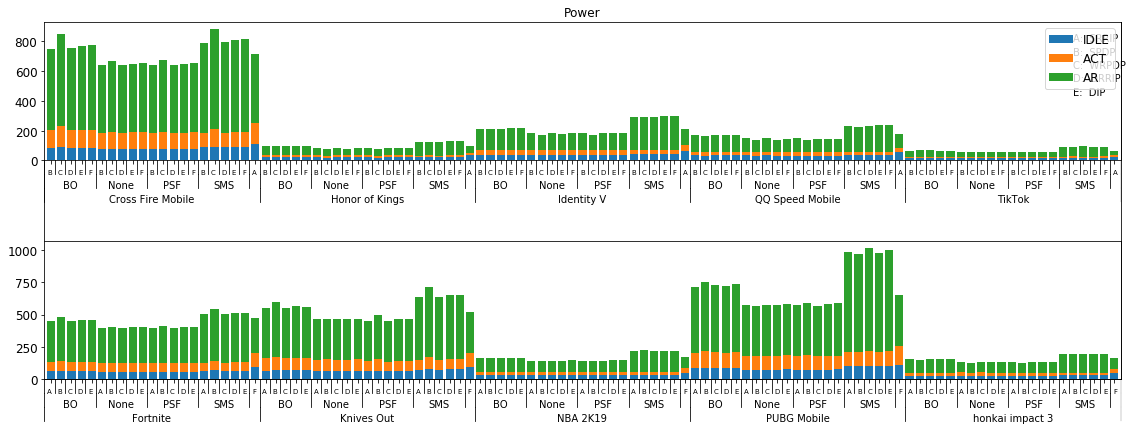

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '8',
#             'ytick.labelsize': '8',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 6.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
idle = D*20 + F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
ar = K*70
power = idle + act + ar

def test_table():
    data_table = pd.DataFrame({'Workload': ['Honor of Kings']*21+ ['QQ Speed Mobile']*21+['TikTok']*21
                               + ['Identity V']*21+['Cross Fire Mobile']*21,
                               'Prefetcher':(['baseline'] + ['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*5,
                               'ReplacePolicy':(['A'] + ['B','C','D','E','F'] * 4)*5,
                               'IDLE':idle[0:5,1:].reshape(1,105).flatten(),
                               'ACT':act[0:5,1:].reshape(1,105).flatten(),
                               'AR':ar[0:5,1:].reshape(1,105).flatten()
                               })
    return data_table

def test_table1():
    data_table = pd.DataFrame({'Workload': ['Fortnite']*21+ ['PUBG Mobile']*21+ ['honkai impact 3']*21
                                +  ['NBA 2K19']*21+ ['Knives Out']*21,
                               'Prefetcher':(['baseline'] +['PSF']*5 + ['SMS']*5 +['None']*5 + ['BO']*5)*5,
                               'ReplacePolicy':(['F'] +['A','B','C','D','E'] * 4)*5,
                               'IDLE':idle[5:10,1:].reshape(1,105).flatten(),
                               'ACT':act[5:10,1:].reshape(1,105).flatten(),
                               'AR':ar[5:10,1:].reshape(1,105).flatten()
                               })
    return data_table

def add_line(ax, xpos, ypos,width):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black',linewidth=width)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    linewidth = 0.8
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            if(rpos == 1):
                if(label!='baseline'):
                    ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes,fontsize=7)#,rotation='vertical'
            else:
                ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)#,rotation='vertical'
            add_line(ax, pos*scale, ypos,linewidth)
            pos += rpos
        add_line(ax, pos*scale , ypos,0.2)
        ypos -= .1

df = test_table().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
#print(df)
fig = plt.figure()
plt.yticks([])  
plt.xticks([]) 
plt.title('Power')

ax = fig.add_subplot(211)
df.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8)#x + i* width/20 - width/2
plt.text(100, 800, 'A:  SRRIP')
plt.text(100, 710, 'B:  SPDP')
plt.text(100, 620, 'C:  WRPDP')
plt.text(100, 530, 'D:  DRRIP')
plt.text(100, 440, 'E:  DIP')
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.subplots_adjust( hspace=-0.8)
ax1 = fig.add_subplot(212)
df1 = test_table1().groupby(['Workload','Prefetcher','ReplacePolicy']).sum()
df1.plot(kind='bar',stacked=True,ax=fig.gca(),width=0.8,legend =False)#x + i* width/20 - width/2
#Below 3 lines remove default labels
labels = ['' for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels)
ax1.set_xlabel('')
label_group_bar_table(ax1, df1)
fig.subplots_adjust(bottom=.1*df1.index.nlevels)
fig.tight_layout()
plt.show()

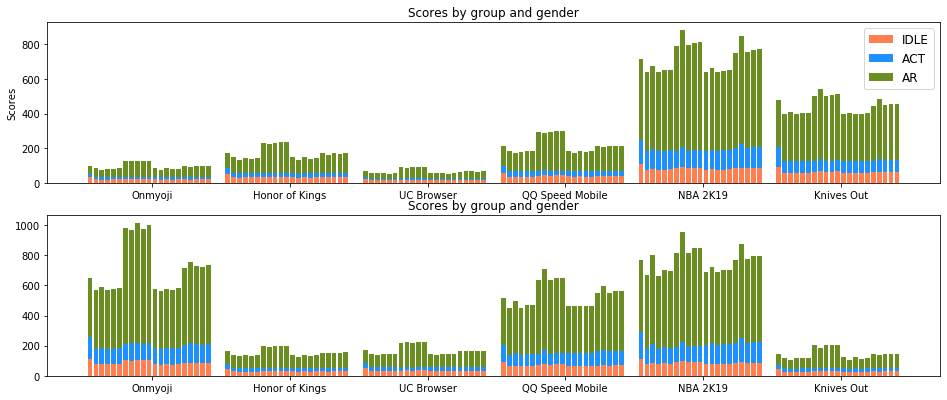

In [10]:
params = {
#             'axes.labelsize': '16',
#             'xtick.labelsize': '8',
#             'ytick.labelsize': '8',
#             'lines.linewidth': '2',
             'legend.fontsize': '12',
            'figure.figsize': '16, 6.5'  # set figure size
        }
pylab.rcParams.update(params)

D = np.array(table.col_values(3)[1:]).reshape(12,22)
F  = np.array(table.col_values(5)[1:]).reshape(12,22)
X =np.array(table.col_values(23)[1:]).reshape(12,22)
AA = np.array(table.col_values(26)[1:]).reshape(12,22)
K =np.array(table.col_values(10)[1:]).reshape(12,22)
idle = D*20 + F*109
act = (X/(AA/1.2/1000000000))/10000000*20.98
ar = K*70
power = idle + act + ar

x = np.arange(len(ds_labels)/2)
width =0.9
rects={}
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(211)
idle = idle[:,1:].reshape(12,21)
act = act[:,1:].reshape(12,21)
ar = ar[:,1:].reshape(12,21)
for i in range(21):  
    rects[i] =  ax.bar(x + i* width/21 - width/2, idle[0:6,i], width/26, color = 'coral')#label=  pf_labels[int(i/5)]  +'_'+ rp_labels[int(i%5)],
    rects[i] =  ax.bar(x + i* width/21 - width/2, act[0:6,i], width/26,  bottom= idle[0:6,i],color = 'dodgerblue')#,color = 'g'
    rects[i] =  ax.bar(x + i* width/21 - width/2, ar[0:6,i], width/26,   bottom= act[0:6,i]+idle[0:6,i], color = 'Olivedrab')#, color = 'b'
    
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(ds_labels)
ax.legend(["IDLE","ACT","AR"])
#ax.legend(loc=5,prop={'size':9}, ncol=4) #图例
ax = fig.add_subplot(212)
for i in range(21):  
    rects[i] =  ax.bar(x + i* width/21 - width/2, idle[6:12,i], width/26, color = 'coral')#label=  pf_labels[int(i/5)]  +'_'+ rp_labels[int(i%5)],
    rects[i] =  ax.bar(x + i* width/21 - width/2, act[6:12,i], width/26,  bottom= idle[6:12,i],color = 'dodgerblue')#,color = 'g'
    rects[i] =  ax.bar(x + i* width/21 - width/2, ar[6:12,i], width/26,   bottom= act[6:12,i]+idle[6:12,i], color = 'Olivedrab')#, color = 'b'
    
#ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(ds_labels)

#fig.tight_layout()

plt.show()

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([1,3,5,np.nan,6,8])
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df['F'] = [1,3,5,np.nan,6,8]

print(df)
print(df.loc['20130106','A'])

                   A         B         C         D    F
2013-01-01 -0.316368  0.792133 -1.363090 -1.388796  1.0
2013-01-02 -0.141082 -0.103863 -1.685553  0.257363  3.0
2013-01-03  1.315270 -1.465549  0.744424  0.741072  5.0
2013-01-04  1.520948  0.817366  0.647162 -0.326212  NaN
2013-01-05  2.271376  1.828242 -0.121543 -0.598382  6.0
2013-01-06  1.142181 -0.554681  0.478865  0.474651  8.0
1.1421807166122482
